# **OBJECTIVE** : To interpret the ADF test results and create a mean reversion strategy.

**STEPS**



*  Import the libraries and the data
*  Create the spread
*  ADF Test
*   Mean reversion strategy
*   Plot the profit and loss (PnL)





















Part I


*  Mean-reversal Strategy
*   Stationarity
*   Math behind ADF Test
*   ADF Test
*   Mean-reversal Strategy







**STATIONARITY**




1.   **A price series is stationary if it doesn’t deviate much but stays around the mean .**
2.   **Augmented Dickey-Fuller (ADF) Test is the test of stationarity**



# **1.IMPORT LIBRARIES**

In [ ]:
import pandas as pd

**UPLOAD FILE**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AUDCAD.csv to AUDCAD.csv
Saving EURCHF.csv to EURCHF.csv
Saving EWA.csv to EWA.csv
Saving EWC.csv to EWC.csv


**READ CSV FILE**


In [ ]:
data = pd.read_csv('AUDCAD.csv',index_col=0)
data.index = pd.to_datetime(data.index)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-01,0.9455,0.9457,0.9440,0.9451,0
2010-01-04,0.9393,0.9513,0.9362,0.9494,0
2010-01-05,0.9498,0.9516,0.9458,0.9473,0
2010-01-06,0.9473,0.9510,0.9465,0.9490,0
2010-01-07,0.9489,0.9540,0.9459,0.9487,0


**Plot the price series**


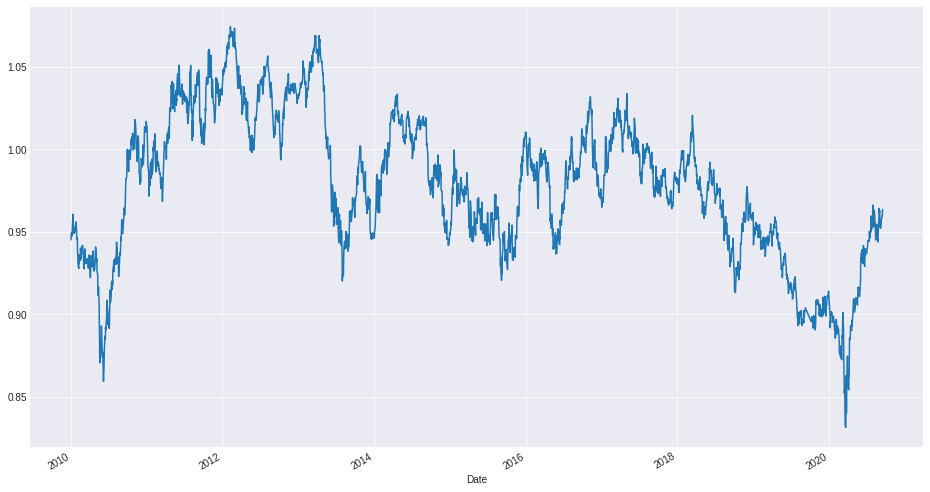

In [ ]:
# Import matplotlib to plot the graph
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16,9)

# Plot the prices series
data.Close.plot()

# Show the plot
plt.show()

# **2.Perform ADF Test**

In [ ]:
# To perform ADF Test
from statsmodels.tsa.stattools import adfuller

help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [ ]:
# Compute ADF test statistics
adf = adfuller(data.Close, maxlag = 1)

**ADF Test statistic**

In [ ]:
adf[0]

-2.840084643195786

**Critical values**

In [ ]:
adf[4]

{'1%': -3.432712096025199,
 '10%': -2.567325544465341,
 '5%': -2.8625836063453063}

# **3.To built a Mean Reversion Strategy**

**STEPS**
•Moving average and moving standard deviation'




1.  Upper band and lower band
2.  Long positions
3. Short positions
4. Strategy PnL





**Mean Reversion Strategy on AUDCAD**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10, 7)

In [ ]:
df = pd.read_csv('AUDCAD.csv', index_col=0)
df.index = pd.to_datetime(df.index)

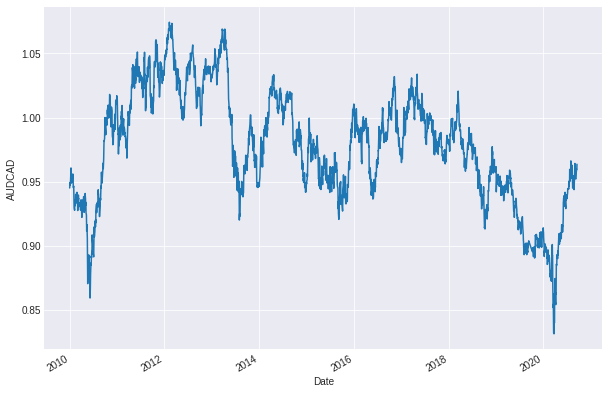

In [ ]:
df.Close.plot()
plt.ylabel("AUDCAD")
plt.show()

**Moving average and moving standard deviation**

In [ ]:
# Moving Average
df['moving_average'] = df.Close.rolling(5).mean()
# Moving Standard Deviation
df['moving_std_dev'] = df.Close.rolling(5).std()
df.head(5)

,Open,High,Low,Close,Volume,moving_average,moving_std_dev
Date,,,,,,,
2010-01-01,0.9455,0.9457,0.9440,0.9451,0,NaN,NaN
2010-01-04,0.9393,0.9513,0.9362,0.9494,0,NaN,NaN
2010-01-05,0.9498,0.9516,0.9458,0.9473,0,NaN,NaN
2010-01-06,0.9473,0.9510,0.9465,0.9490,0,NaN,NaN
2010-01-07,0.9489,0.9540,0.9459,0.9487,0,0.9479,0.001754


# **BOLLINGER BANDS : AUDCAD**
**Upper band and lower band**

In [ ]:
df['upper_band'] = df.moving_average + 0.5*df.moving_std_dev
df['lower_band'] = df.moving_average - 0.5*df.moving_std_dev
df.head(5)

,Open,High,Low,Close,Volume,moving_average,moving_std_dev,upper_band,lower_band
Date,,,,,,,,,
2010-01-01,0.9455,0.9457,0.9440,0.9451,0,NaN,NaN,NaN,NaN
2010-01-04,0.9393,0.9513,0.9362,0.9494,0,NaN,NaN,NaN,NaN
2010-01-05,0.9498,0.9516,0.9458,0.9473,0,NaN,NaN,NaN,NaN
2010-01-06,0.9473,0.9510,0.9465,0.9490,0,NaN,NaN,NaN,NaN
2010-01-07,0.9489,0.9540,0.9459,0.9487,0,0.9479,0.001754,0.948777,0.947023


# **LONG POSITIONS** 


**Long entry and exit**

In [ ]:
df['long_entry'] = df.Close < df.lower_band
df['long_exit'] = df.Close >= df.moving_average
df.head(5)

,Open,High,Low,Close,Volume,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit
Date,,,,,,,,,,,
2010-01-01,0.9455,0.9457,0.9440,0.9451,0,NaN,NaN,NaN,NaN,False,False
2010-01-04,0.9393,0.9513,0.9362,0.9494,0,NaN,NaN,NaN,NaN,False,False
2010-01-05,0.9498,0.9516,0.9458,0.9473,0,NaN,NaN,NaN,NaN,False,False
2010-01-06,0.9473,0.9510,0.9465,0.9490,0,NaN,NaN,NaN,NaN,False,False
2010-01-07,0.9489,0.9540,0.9459,0.9487,0,0.9479,0.001754,0.948777,0.947023,False,True


In [ ]:
df['positions_long'] = np.nan
df.loc[df.long_entry, 'positions_long'] = 1
df.loc[df.long_exit, 'positions_long'] = 0
df.head(5)

,Open,High,Low,Close,Volume,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,positions_long
Date,,,,,,,,,,,,
2010-01-01,0.9455,0.9457,0.9440,0.9451,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-04,0.9393,0.9513,0.9362,0.9494,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-05,0.9498,0.9516,0.9458,0.9473,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-06,0.9473,0.9510,0.9465,0.9490,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-07,0.9489,0.9540,0.9459,0.9487,0,0.9479,0.001754,0.948777,0.947023,False,True,0.0


**Forward fill Long Positions**

In [ ]:
df.positions_long = df.positions_long.fillna(method='ffill')
df.head(5)

,Open,High,Low,Close,Volume,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,positions_long
Date,,,,,,,,,,,,
2010-01-01,0.9455,0.9457,0.9440,0.9451,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-04,0.9393,0.9513,0.9362,0.9494,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-05,0.9498,0.9516,0.9458,0.9473,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-06,0.9473,0.9510,0.9465,0.9490,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-07,0.9489,0.9540,0.9459,0.9487,0,0.9479,0.001754,0.948777,0.947023,False,True,0.0


# **SHORT POSITION**

In [ ]:
df['short_entry'] = df.Close > df.upper_band
df['short_exit'] = df.Close <= df.moving_average

df['positions_short'] = np.nan
df.loc[df.short_entry, 'positions_short'] = -1
df.loc[df.short_exit, 'positions_short'] = 0

df.positions_short = df.positions_short.fillna(method='ffill')

# **TOTAL POSITION**

In [ ]:
df['positions'] = df.positions_long + df.positions_short

# **4.Cumulative Returns**

In [ ]:
df['percentage_change'] = df.Close.pct_change()
df['strategy_returns'] = df.positions.shift(1) * df.percentage_change
df['cumulative_returns'] = (df.strategy_returns+1).cumprod()

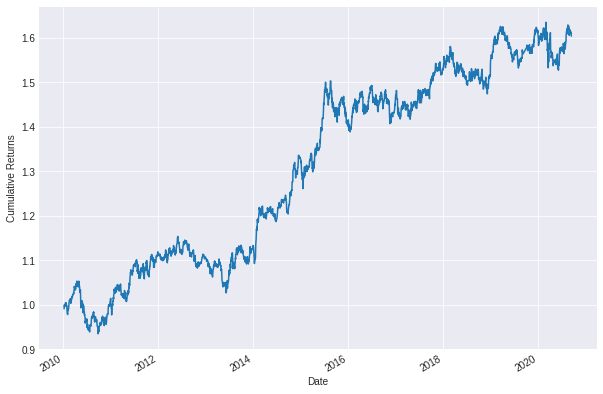

In [ ]:
df.cumulative_returns.plot(label='Cumulative Returns', figsize=(10, 7))
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()



# **5.Calculate the max drawdown**



The maximum drawdown is -11.25


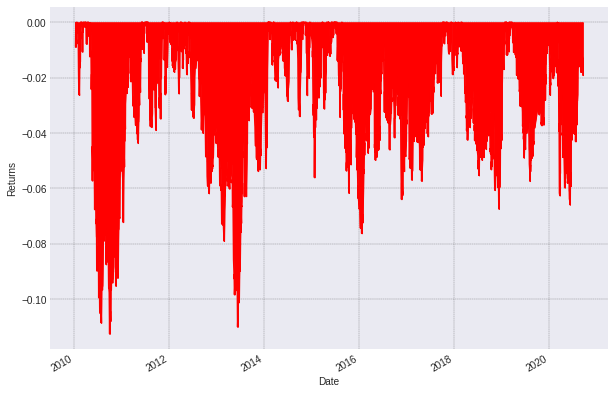

In [ ]:
def calc_drawdown(cum_rets):
    # Calculate the running maximum
    running_max = np.maximum.accumulate(cum_rets.dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (cum_rets)/running_max - 1
    return drawdown


def plot_drawdown(drawdown):
    fig = plt.figure(figsize=(10, 7))
    # Plot
    drawdown.plot(color='r')
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()


drawdown = calc_drawdown(df.cumulative_returns)
print("The maximum drawdown is %.2f" % (drawdown.min()*100))
plot_drawdown(drawdown)